In [1]:
import numpy as np
import matplotlib.pyplot as plt

# GLASS imports: matter shells, galaxies, random points, and observational
import glass.galaxies
import glass.observations

# how many arcmin2 over the entire sphere
from glass.core.constants import ARCMIN2_SPHERE


# galaxy density
n_arcmin2 = 1e-4

# photometric redshift error at redshift 0
phz_sigma_0 = 0.05

# parametric galaxy redshift distribution following Smail et al. (1994).

z = np.linspace(0, 3, 301)
dndz = n_arcmin2 * glass.observations.smail_nz(z, 1.0, 2.2, 1.5) # (redshift x vals, mode, powerlaw exp, logpowerlaw exp)

# compute the over galaxy number density on the sphere / arcmin2
ngal = np.trapz(dndz, z)

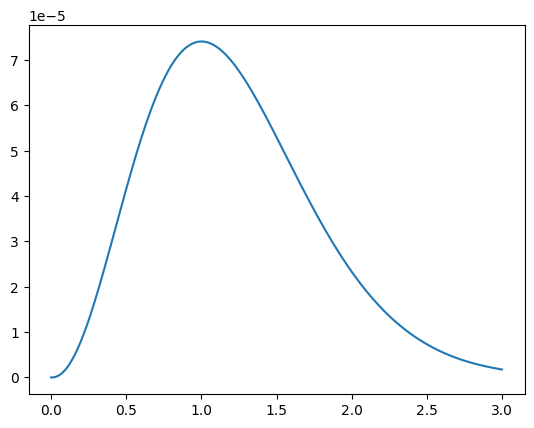

In [2]:
plt.plot(z, dndz)

In [16]:
# sample the number (not density) of galaxies from the Poisson distribution
n = np.random.poisson(ngal * ARCMIN2_SPHERE)
print(n)

# sample n true redshifts
ztrue = glass.galaxies.redshifts_from_nz(n, z, dndz)

# sample n photometric redshifts
zphot = glass.galaxies.gaussian_phz(ztrue, phz_sigma_0)

14994


Poisson Distribution number of galaxies:

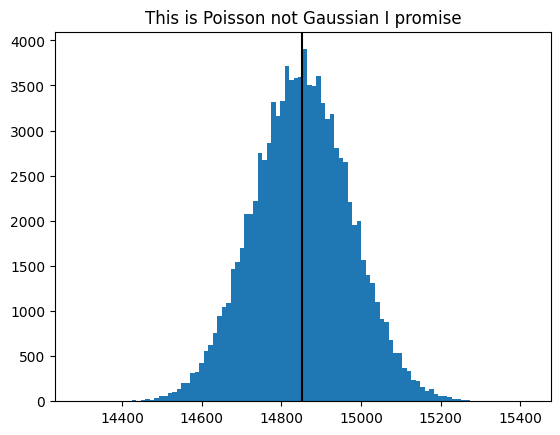

In [24]:
plt.hist(np.random.poisson(ngal * ARCMIN2_SPHERE, size = 100000), bins = 100)
plt.axvline(ngal * ARCMIN2_SPHERE, color = 'k')
plt.title("This is Poisson not Gaussian I promise")
plt.show()

Redshift dependent photometric uncertainty $\sigma \propto 1+z$ using `glass.galaxies.gaussian_phz`.

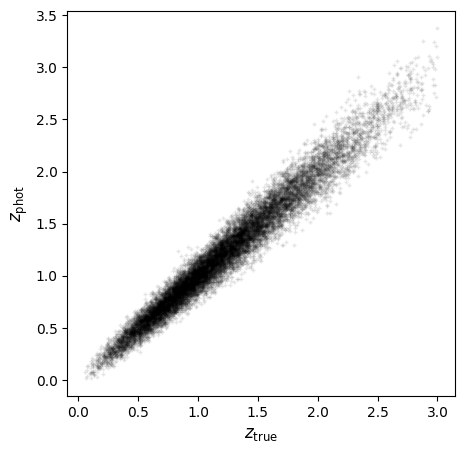

In [17]:
plt.figure(figsize=(5, 5))
plt.plot(ztrue, zphot, '+k', ms=3, alpha=0.1)
plt.xlabel(r'$z_{\rm true}$', size=12)
plt.ylabel(r'$z_{\rm phot}$', size=12)
plt.show()

Now define a number of photometric redshift bins. They are chosen by the `equal_dens_zbins()` function to produce the same number of galaxies in each bin.

In [6]:
nbins = 5
zbins = glass.observations.equal_dens_zbins(z, dndz, nbins)

In [26]:
glass.observations.tomo_nz_gausserr?

Signature:
glass.observations.tomo_nz_gausserr(
    z: numpy.ndarray,
    nz: numpy.ndarray,
    sigma_0: float,
    zbins: List[Tuple[float, float]],
) -> numpy.ndarray
Docstring:
tomographic redshift bins with a Gaussian redshift error

This function takes a _true_ overall source redshift distribution ``z``,
``nz`` and returns tomographic source redshift distributions for the
tomographic redshift bins given by ``zbins``.  It is assumed that sources
are assigned a tomographic redshift bin with a Gaussian error [1]_. The
standard deviation of the Gaussian depends on redshift and is given by
``sigma(z) = sigma_0*(1 + z)``.

Parameters
----------
z, nz : array_like
    The true source redshift distribution. Must be one-dimensional.
sigma_0 : float
    Redshift error in the tomographic binning at zero redshift.
zbins : list of tuple of float
    List of redshift bin edges.

Returns
-------
binned_nz : array_like
    Tomographic redshift bins convolved with a gaussian error.
    Array has 

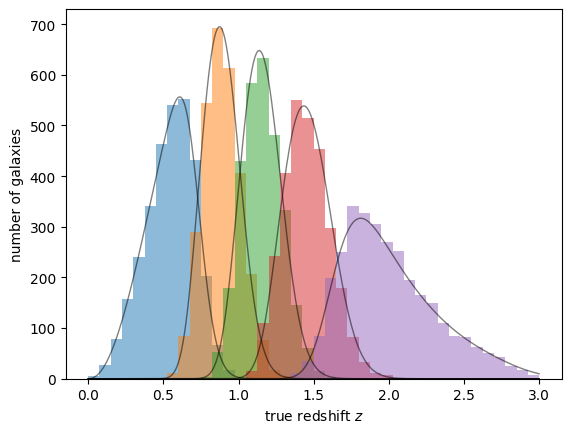

In [25]:
tomo_nz = glass.observations.tomo_nz_gausserr(z, dndz, phz_sigma_0, zbins)
tomo_nz *= ARCMIN2_SPHERE*(z[-1] - z[0])/40

for (z1, z2), nz in zip(zbins, tomo_nz):
    plt.hist(ztrue[(z1 <= zphot) & (zphot < z2)], bins=40, range=(z[0], z[-1]),
             histtype='stepfilled', alpha=0.5)
    plt.plot(z, nz, '-k', lw=1, alpha=0.5)
plt.xlabel('true redshift $z$')
plt.ylabel('number of galaxies')
plt.show()